In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flood-condition-dataset/Flood_affected/Sample_Submission.csv
/kaggle/input/flood-condition-dataset/Flood_affected/Train_Data.csv
/kaggle/input/flood-condition-dataset/Flood_affected/Test_Data.csv


In [3]:
df = pd.read_csv('/kaggle/input/flood-condition-dataset/Flood_affected/Train_Data.csv')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.0,1.00,1.0,21,1
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.0,0.02,0.0,18,0
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.0,0.00,0.0,21,0
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,21,0
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.0,1.00,1.0,19,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86845 entries, 0 to 86844
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                86845 non-null  int64  
 1   protocoltype            86845 non-null  object 
 2   service                 86845 non-null  object 
 3   flag                    86845 non-null  object 
 4   srcbytes                86845 non-null  int64  
 5   dstbytes                86845 non-null  int64  
 6   land                    86845 non-null  int64  
 7   wrongfragment           86845 non-null  int64  
 8   urgent                  86845 non-null  int64  
 9   hot                     86845 non-null  int64  
 10  numfailedlogins         86845 non-null  int64  
 11  loggedin                86845 non-null  int64  
 12  numcompromised          86845 non-null  int64  
 13  rootshell               86845 non-null  int64  
 14  suattempted             86845 non-null

# **Handling missing values**

<Axes: >

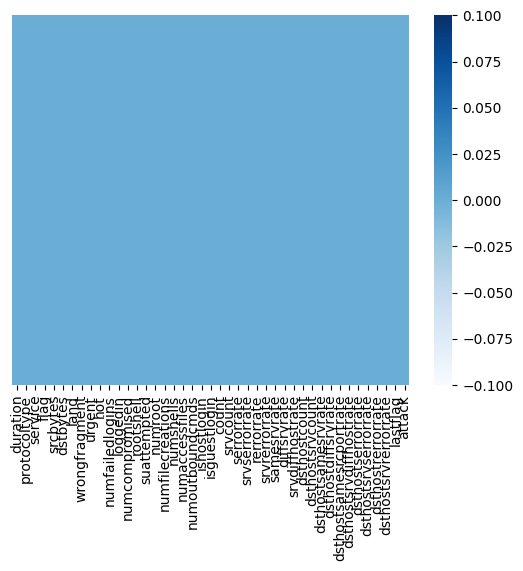

In [5]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels = False, cmap = 'Blues',xticklabels= df.columns)

**So there are no missing values**

In [6]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
count,86845.000000,8.684500e+04,8.684500e+04,86845.000000,86845.0,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,...,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000
mean,104.166872,8.455707e+03,2.732095e+03,0.000046,0.0,0.000035,0.144971,0.000771,0.441142,0.320583,...,0.526457,0.050186,0.075810,0.016246,0.324666,0.318934,0.092391,0.091045,20.060522,0.379964
std,1038.273538,3.582141e+05,5.543041e+04,0.006787,0.0,0.007588,1.837958,0.037009,0.496527,27.993474,...,0.447353,0.103323,0.208388,0.055271,0.464291,0.463506,0.282768,0.281452,1.421425,0.485380
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
50%,0.000000,4.600000e+01,4.400000e+01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.550000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
75%,0.000000,2.720000e+02,7.680000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.070000,0.020000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,40504.000000,8.958152e+07,7.028652e+06,1.000000,0.0,2.000000,77.000000,4.000000,1.000000,7479.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000


**If you see the 75% and max row then for the columns ['duration','srcbytes','land','urgent','hot','numfailedlogins','numcompromised'] they have values greater than the 75%. so they have outliers**

# Label encoding

In [7]:
df['protocoltype'].value_counts()

protocoltype
tcp     75876
udp      9929
icmp     1040
Name: count, dtype: int64

In [8]:
df['service'].value_counts()

service
http        31505
private     12859
domain_u     7196
smtp         5806
ftp_data     4929
            ...  
printer        46
urh_i           9
red_i           6
tim_i           4
tftp_u          3
Name: count, Length: 65, dtype: int64

In [9]:
df['flag'].value_counts()

flag
SF      50672
S0      27773
REJ      6721
RSTO     1127
S1        294
RSTR      106
S2        103
S3         38
OTH        10
SH          1
Name: count, dtype: int64

In [10]:
X = df.drop('attack',axis=1)
y = df['attack']

In [11]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['protocoltype', 'service', 'flag']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    X[column + '_Label'] = label_encoder.fit_transform(X[column])
    X = X.drop(column,axis=1)

In [12]:
df = pd.concat([X,y],axis=1)

In [13]:
df.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,protocoltype_Label,service_Label,flag_Label,attack
0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,1.00,1.0,21,1,33,1,1
1,0,1239,400,0,0,0,0,0,1,0,...,0.00,0.11,0.0,0.02,0.0,18,1,49,8,0
2,0,222,945,0,0,0,0,0,1,0,...,0.03,0.00,0.0,0.00,0.0,21,1,22,8,0
3,0,235,1380,0,0,0,0,0,1,0,...,0.00,0.00,0.0,0.00,0.0,21,1,22,8,0
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,1.00,1.0,19,1,62,1,1


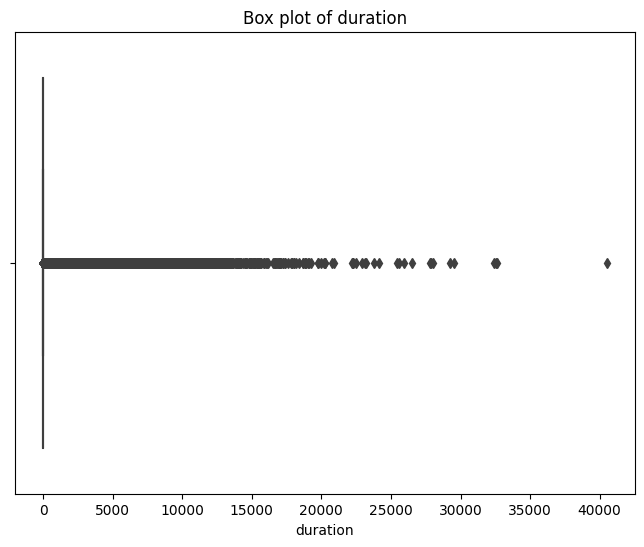

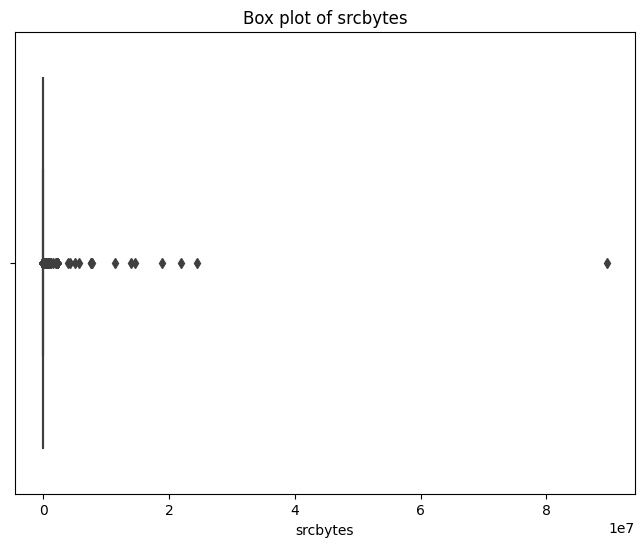

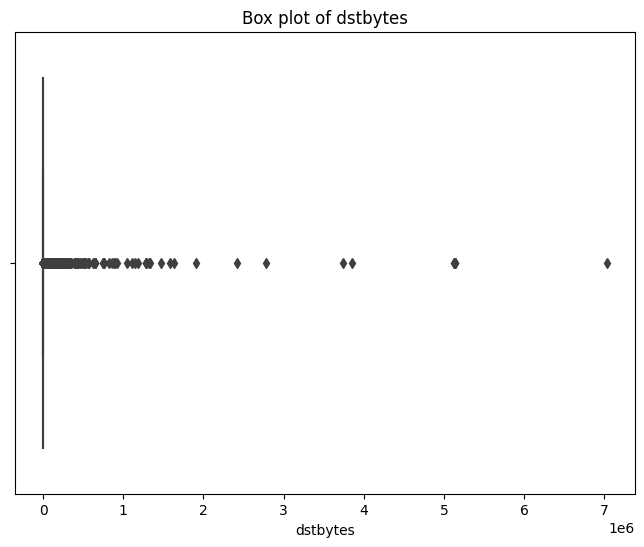

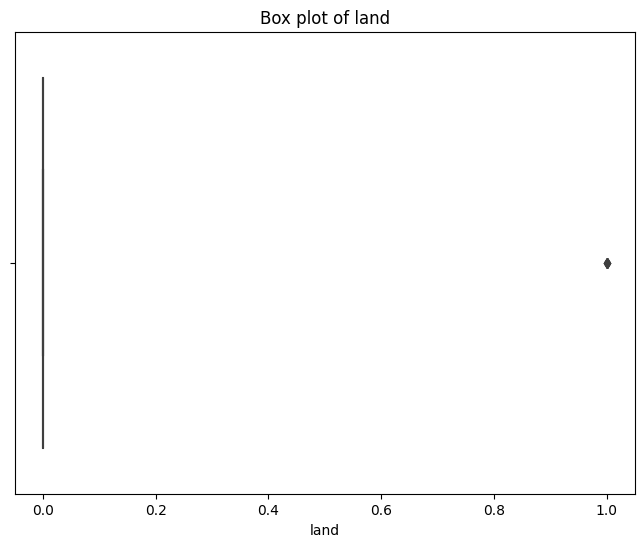

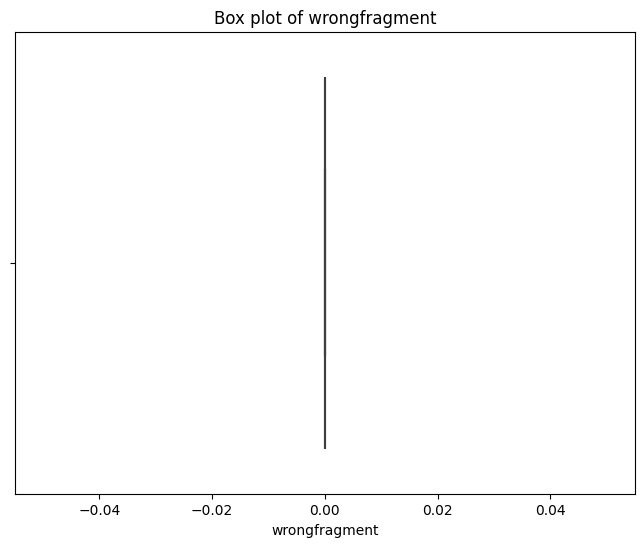

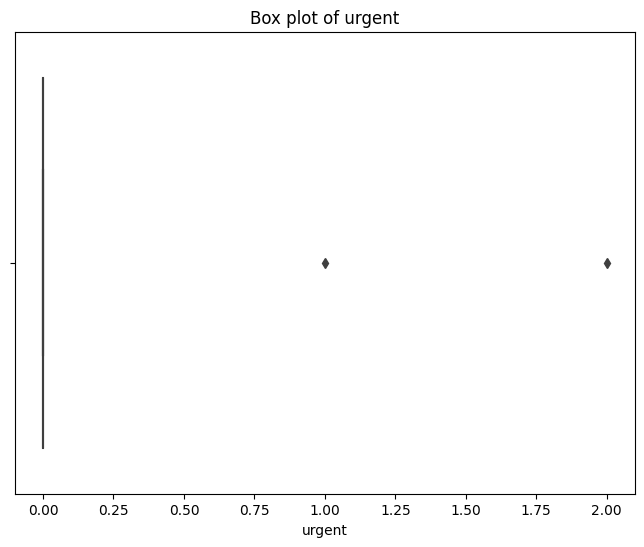

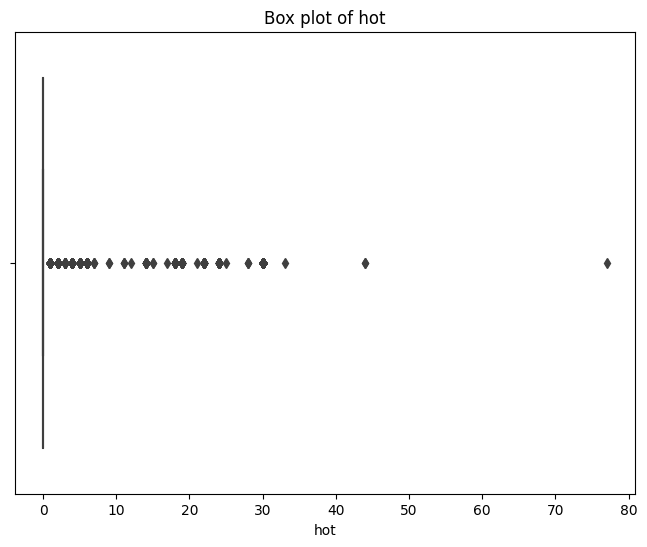

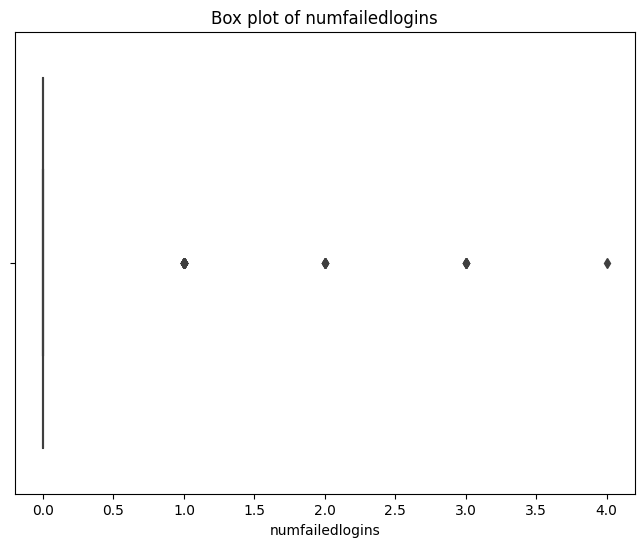

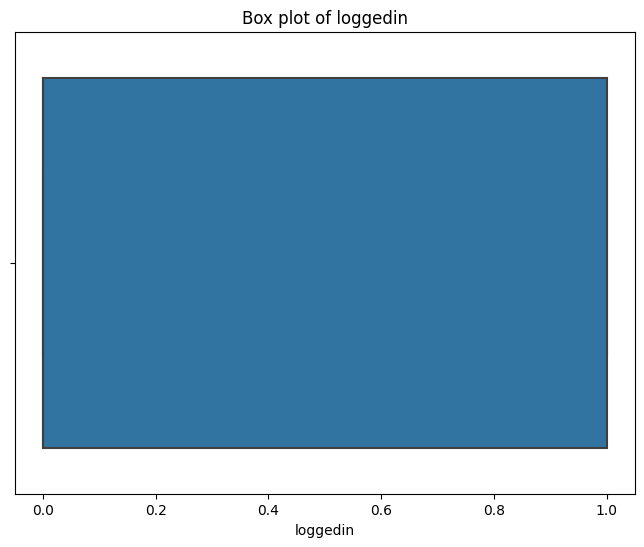

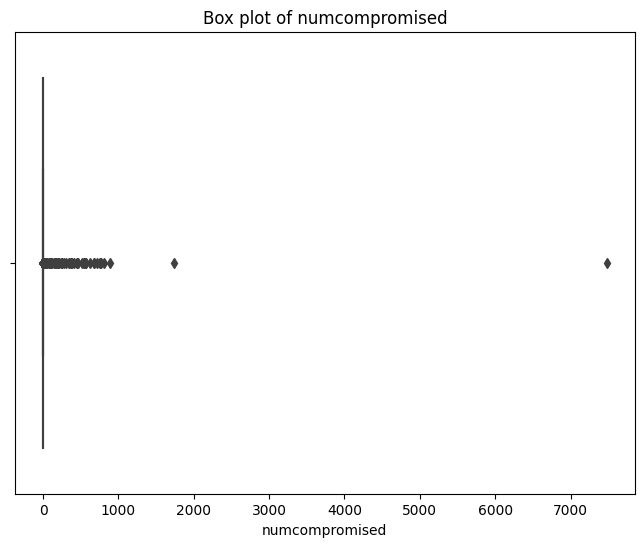

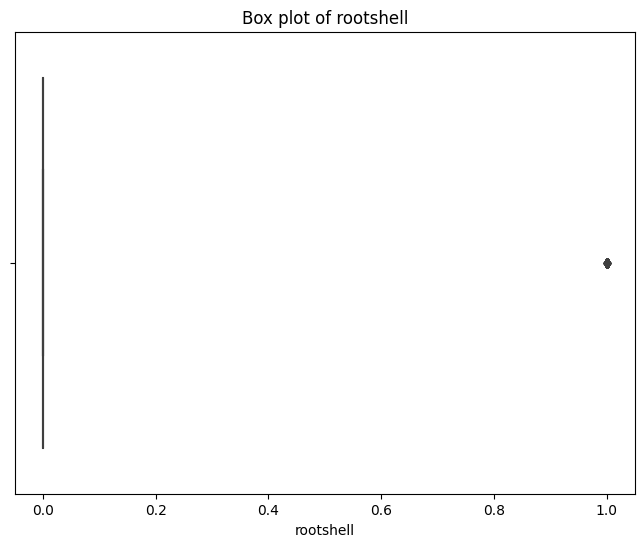

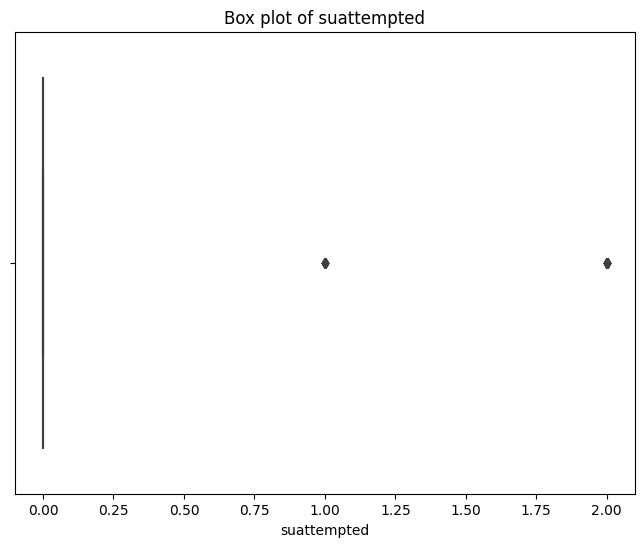

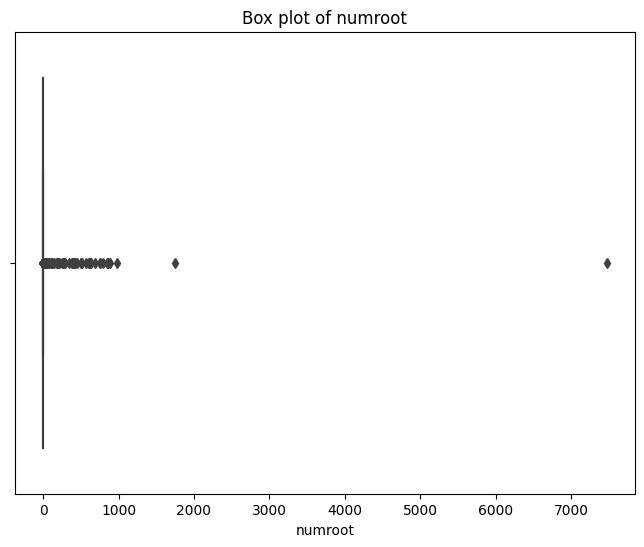

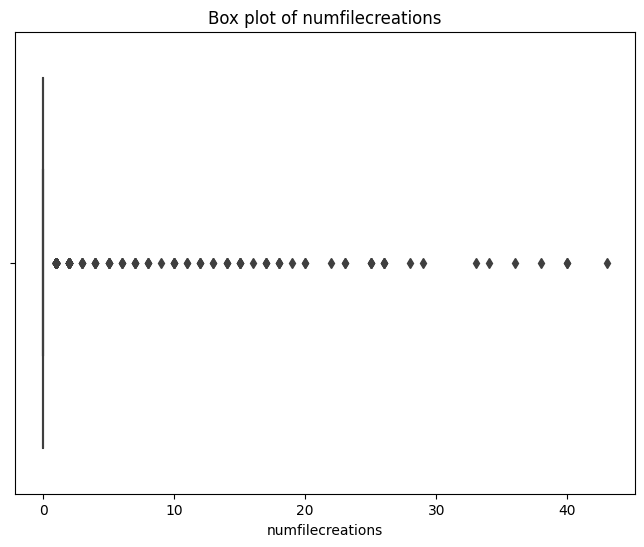

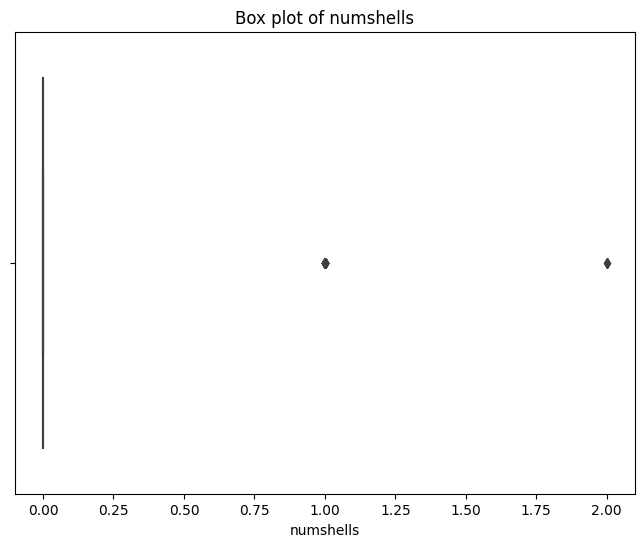

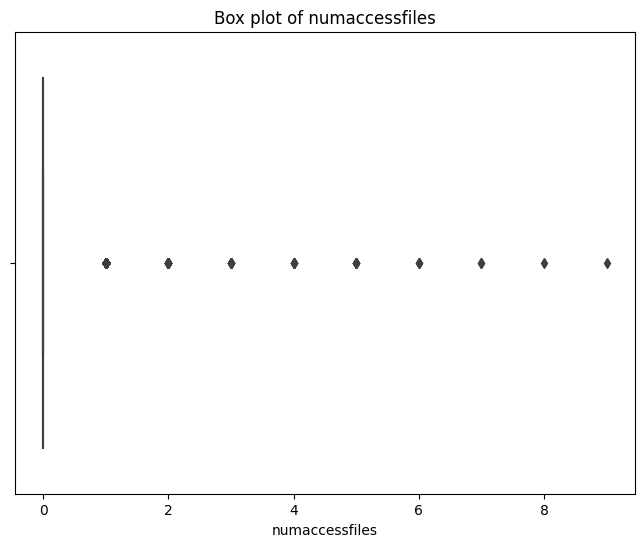

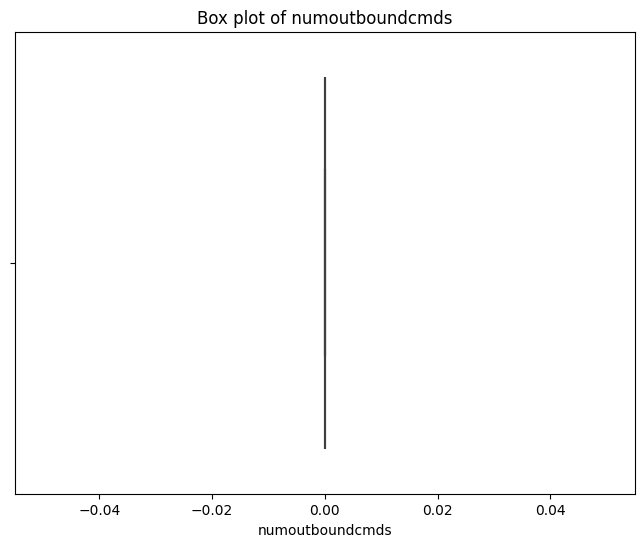

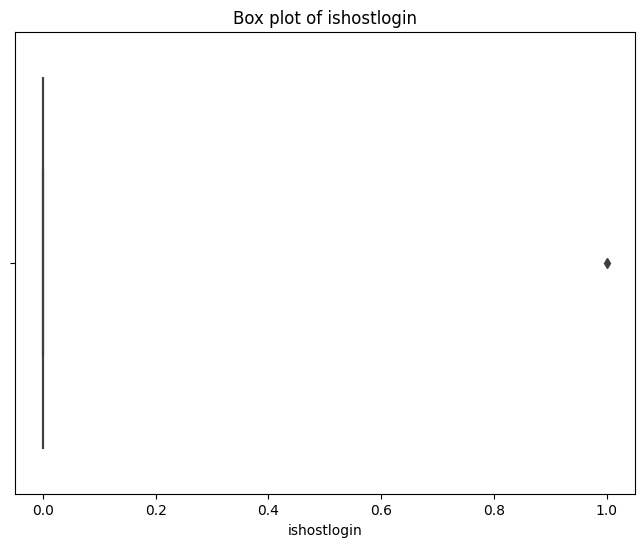

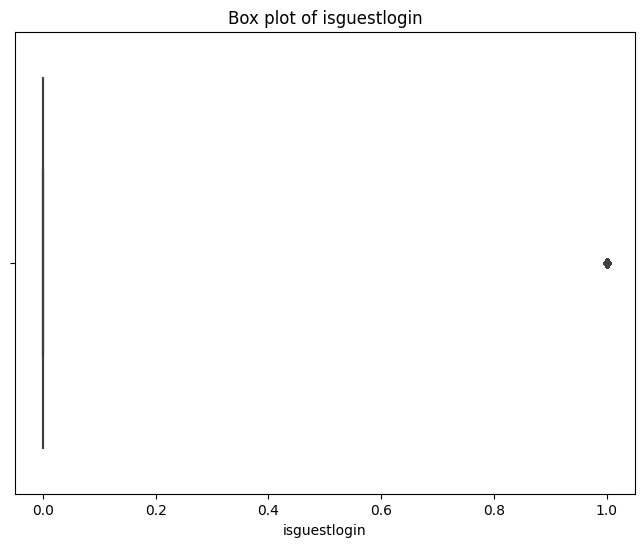

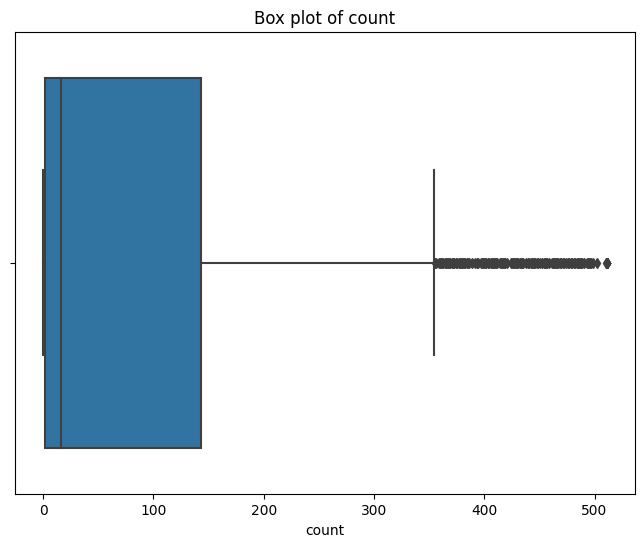

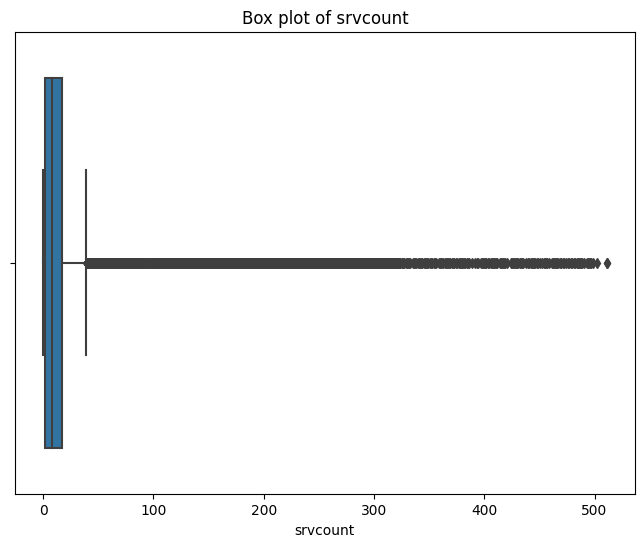

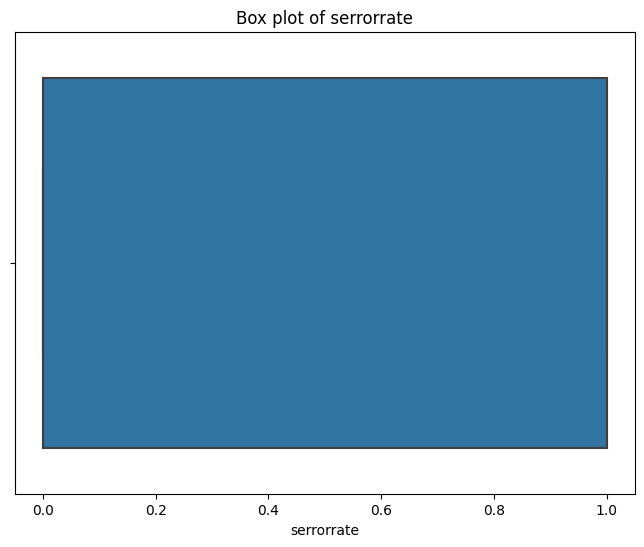

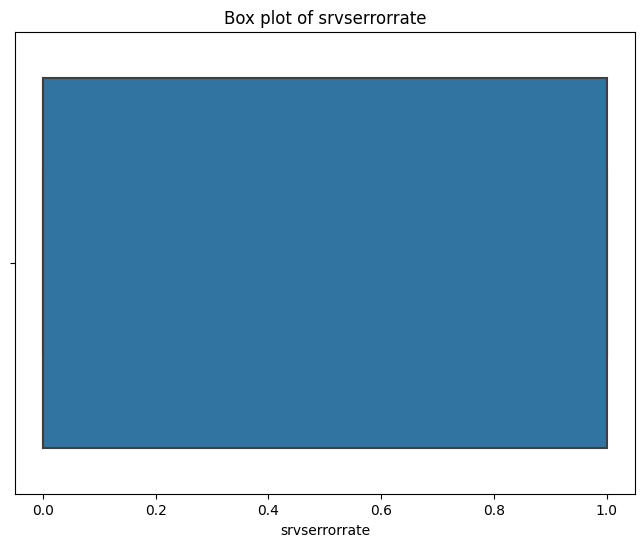

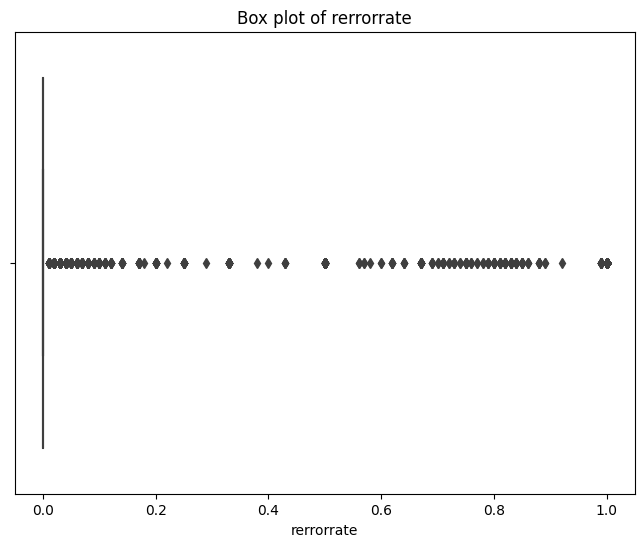

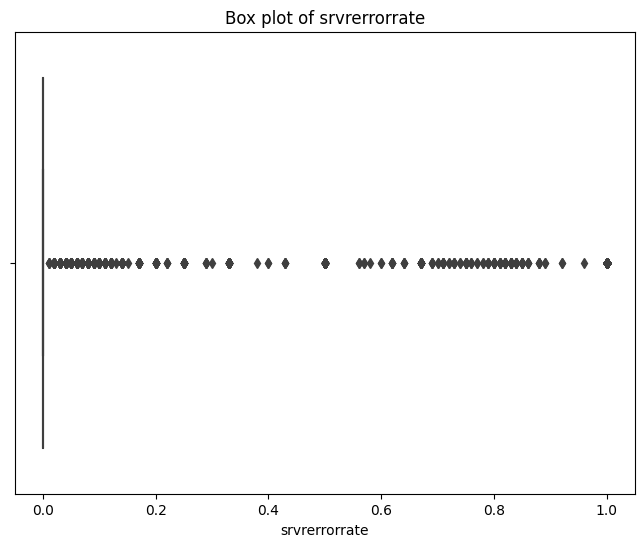

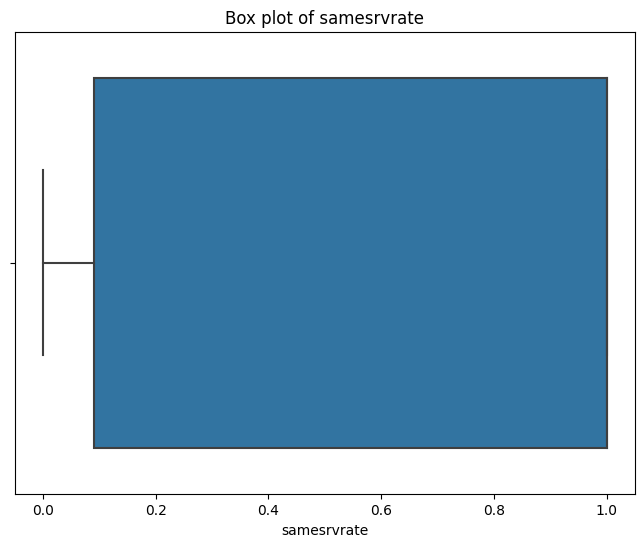

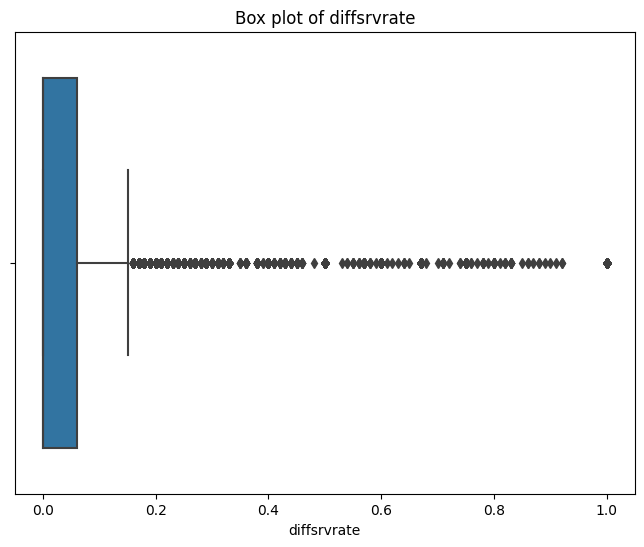

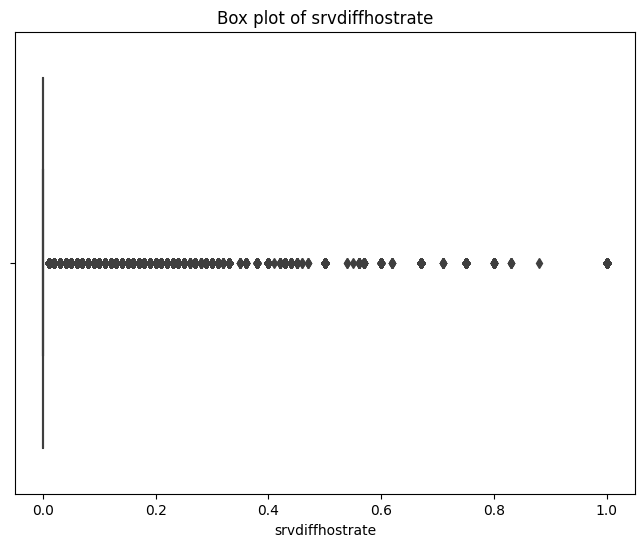

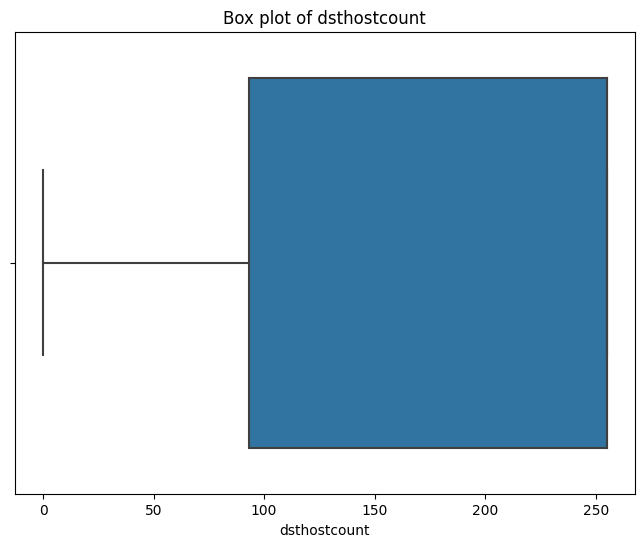

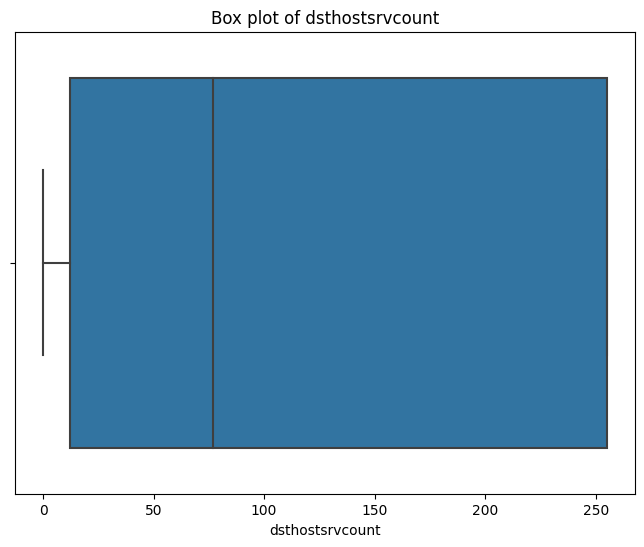

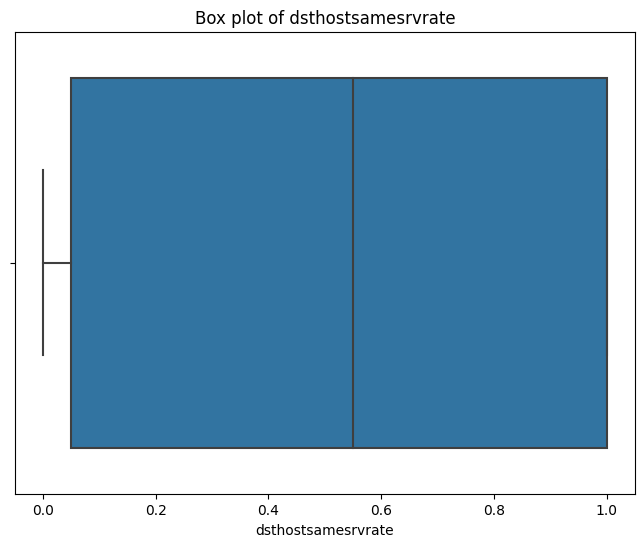

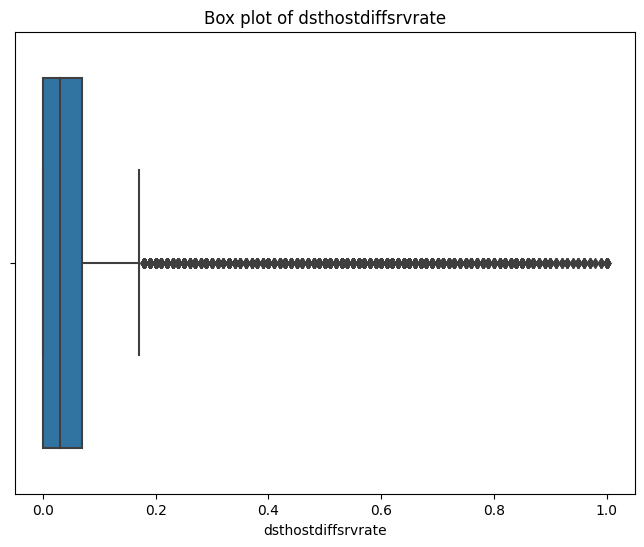

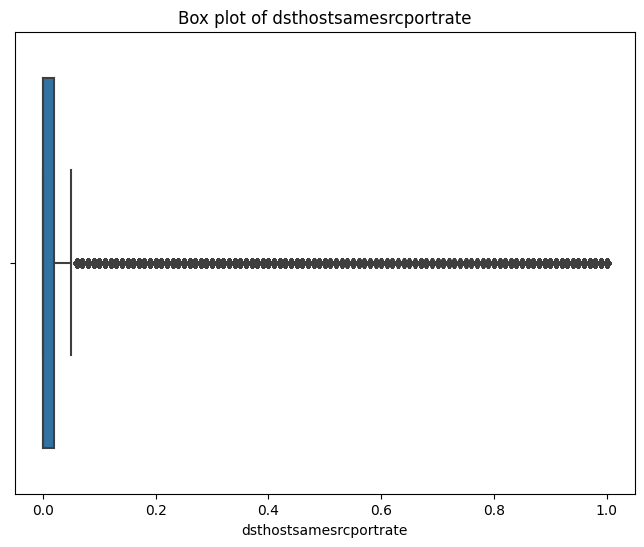

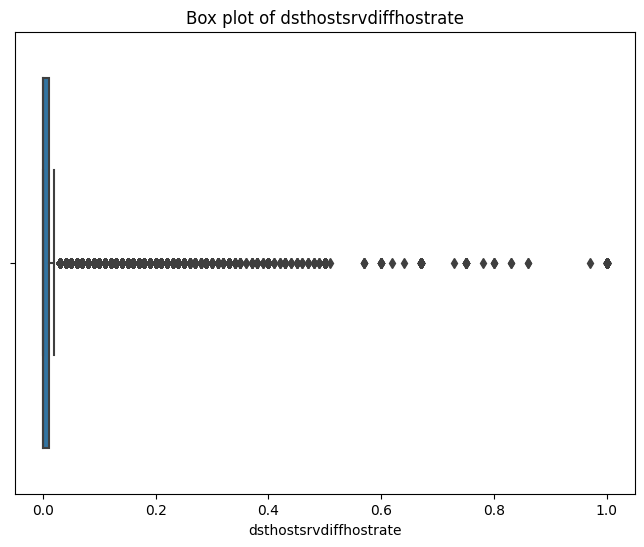

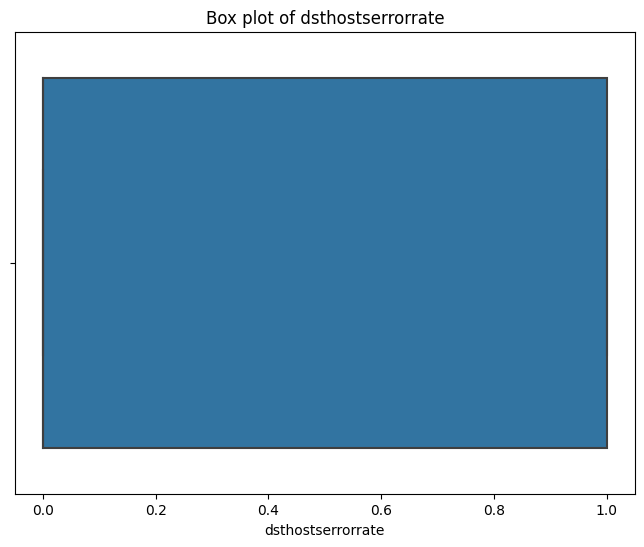

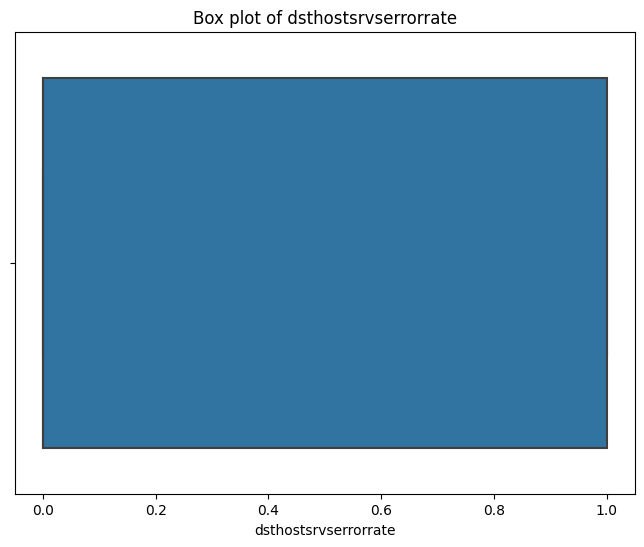

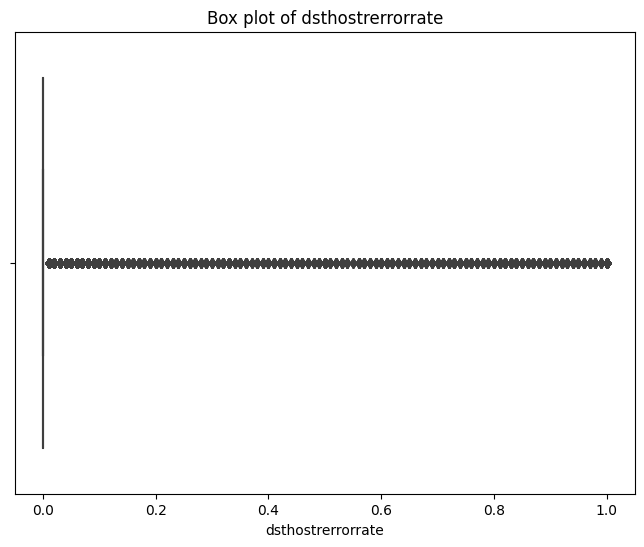

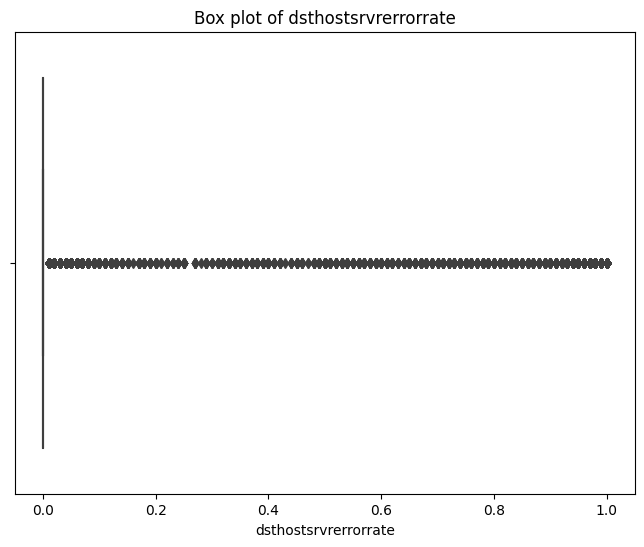

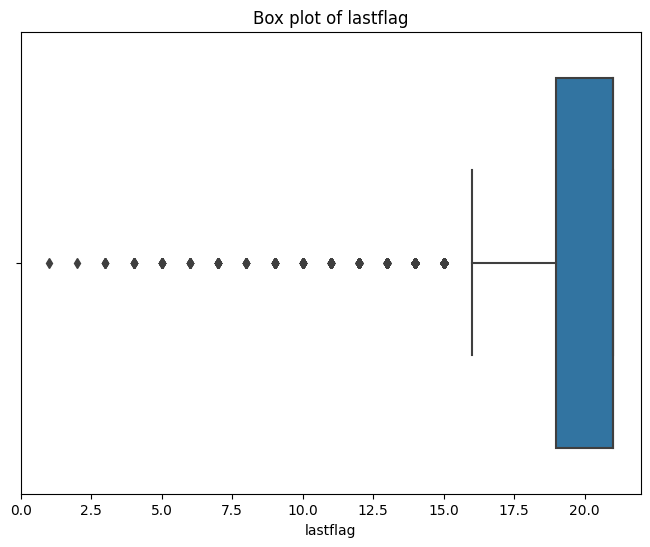

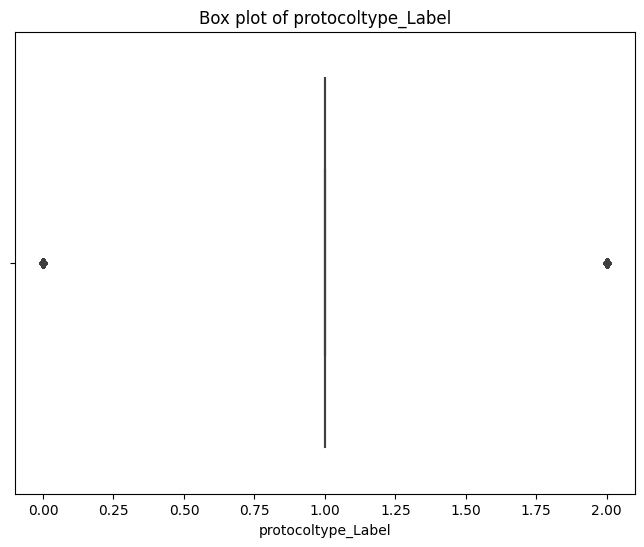

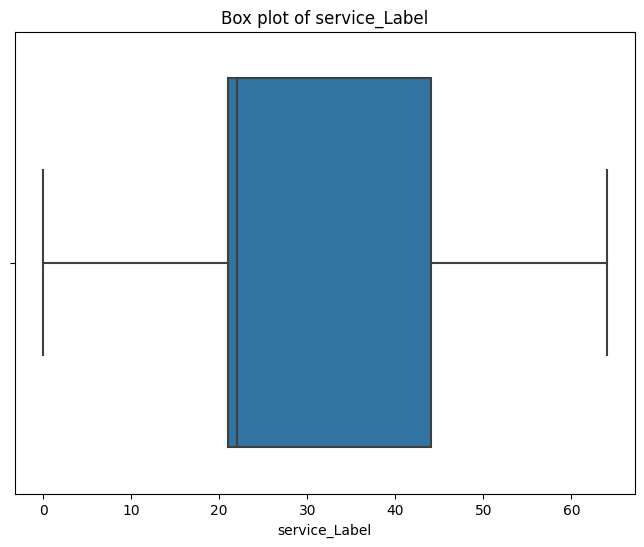

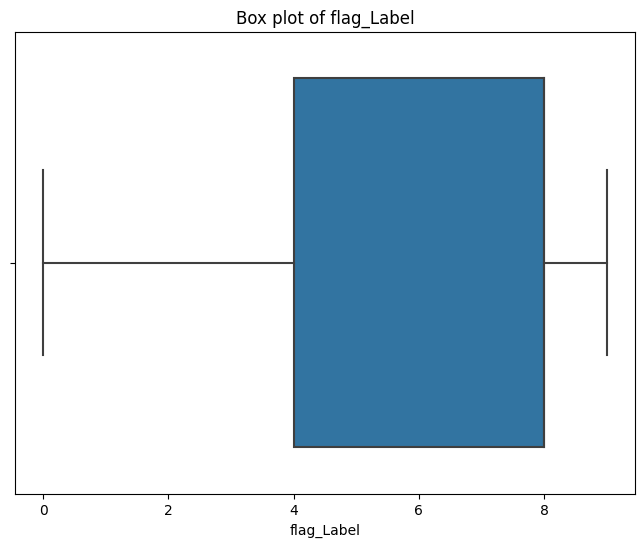

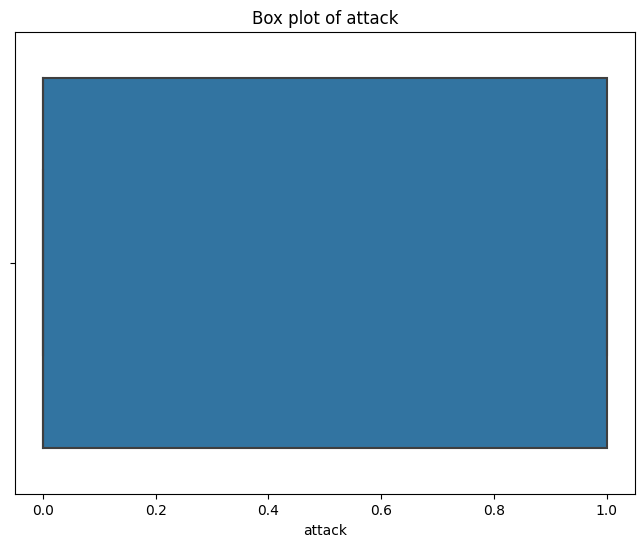

In [14]:
import matplotlib.pyplot as plt
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

In [15]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file("pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Using of VIF

**High Correlation among Features:**

**Feature Selection:** Use techniques like Variance Inflation Factor (VIF) to identify and remove features causing multicollinearity

**Dimensionality Reduction:** Techniques like Principal Component Analysis (PCA) can reduce redundancy while retaining most of the variance in the data

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"]
print(high_vif_features)

/opt/conda/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


8                 loggedin
9           numcompromised
12                 numroot
21              serrorrate
22           srvserrorrate
23              rerrorrate
24           srvrerrorrate
25             samesrvrate
28            dsthostcount
29         dsthostsrvcount
30      dsthostsamesrvrate
34       dsthostserrorrate
35    dsthostsrvserrorrate
36       dsthostrerrorrate
37    dsthostsrvrerrorrate
38                lastflag
39      protocoltype_Label
41              flag_Label
Name: Feature, dtype: object


In [17]:
X = X.drop(columns=high_vif_features)

# Imbalanced Features:

**1. Drop Imbalanced Features:** Features that are highly imbalanced (e.g., more than 99% of values are the same) often don’t provide much useful information and can be dropped.

 **2. Transform or Encode:** In some cases, you might transform or combine imbalanced features with other features to retain some of their information.

In [18]:
imbalanced_features = ['land', 'urgent', 'numfailedlogins', 'rootshell', 'suattempted', 
                       'numshells', 'ishostlogin', 'isguestlogin']

X = X.drop(columns=imbalanced_features)

# Skewed Features:

**Log Transformation:** Apply a logarithmic transformation to reduce skewness.

**Other Transformations:** Square root or Box-Cox transformations can also help

In [19]:
skewed_features = ['srcbytes', 'dstbytes',
                   'numfilecreations', 'numaccessfiles']

for feature in skewed_features:
    X[feature] = np.log1p(X[feature])  # log1p handles log(0) cases

# Handle Features with Many Zeros

In [20]:
zero_features = ['duration', 'hot', 'numfilecreations', 
                 'numaccessfiles',  
                 'diffsrvrate', 'srvdiffhostrate', 
                 'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate'
                  ]

X = X.drop(columns=zero_features)

In [22]:
X

,srcbytes,dstbytes,wrongfragment,numoutboundcmds,count,srvcount,service_Label
0,0.000000,0.000000,0,0,277,15,33
1,7.122867,5.993961,0,0,1,1,49
2,5.407172,6.852243,0,0,21,25,22
3,5.463832,7.230563,0,0,4,4,22
4,0.000000,0.000000,0,0,256,3,62
...,...,...,...,...,...,...,...
86840,5.379897,6.514713,0,0,2,2,22
86841,5.910797,7.453562,0,0,19,19,22
86842,7.302496,8.331586,0,0,1,1,18
86843,7.426549,5.955837,0,0,1,1,49


# Train-Test-Split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [24]:
print('train shape = ',X_train.shape)
print('test shape = ',X_test.shape)

train shape =  (58186, 7)
test shape =  (28659, 7)


In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.feature_selection import RFE

In [26]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
#     print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

In [27]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

Accuracy for Logistic Regression : 0.99229 



In [28]:
ada = AdaBoostClassifier(n_estimators=1000,random_state=0)
score(ada,"Ada Boost Classifier")

Accuracy for Ada Boost Classifier : 0.99784 



In [29]:
rf = RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=0)
score(rf,"Random Forest Classification")

Accuracy for Random Forest Classification : 0.99791 



In [30]:
gnb = GaussianNB(var_smoothing=1e-8)
score(gnb,"Gaussian Naive Bias")

Accuracy for Gaussian Naive Bias : 0.96996 



In [31]:
knnc = KNeighborsClassifier(
    n_neighbors=6,
    p=2,
    metric='minkowski'
)
score(knnc,"KNeighborsClassifier")

Accuracy for KNeighborsClassifier : 0.9971 



In [32]:
dtc = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    random_state=0
)
score(dtc,"DecisionTreeClassifier")

Accuracy for DecisionTreeClassifier : 0.99766 



In [33]:
xgbc = XGBClassifier(n_estimators=1000,learning_rate=0.01)
score(xgbc,"XGBClassifier")

Accuracy for XGBClassifier : 0.9978 



In [34]:
xgbrf = XGBRFClassifier(n_estimators=1000, max_depth=10, learning_rate=0.01, random_state=0)
score(xgbrf,"XGBRFClassifier")

Accuracy for XGBRFClassifier : 0.62033 



# Confusion Matrix


In [35]:
for i in [lg,ada,rf,gnb,knnc,dtc,xgbc,xgbrf]:
  i.fit(X_train, y_train)
  preds = i.predict(X_test)
  print("model : ",i)
  print(confusion_matrix(y_test, preds))
  print("  ")

model :  LogisticRegression(multi_class='multinomial', random_state=0)
[[17703    75]
 [  146 10735]]
  
model :  AdaBoostClassifier(n_estimators=1000, random_state=0)
[[17752    26]
 [   36 10845]]
  
model :  RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0)
[[17748    30]
 [   30 10851]]
  
model :  GaussianNB(var_smoothing=1e-08)
[[16917   861]
 [    0 10881]]
  
model :  KNeighborsClassifier(n_neighbors=6)
[[17753    25]
 [   58 10823]]
  
model :  DecisionTreeClassifier(max_depth=10, random_state=0)
[[17753    25]
 [   42 10839]]
  
model :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
  

In [36]:
from sklearn.metrics import classification_report
for i in [lg,ada,rf,gnb,knnc,dtc,xgbc,xgbrf]:
  i.fit(X_train, y_train)
  preds = i.predict(X_test)
  print("model : ",i)
  print(classification_report(y_test, preds))
  print("  ")

model :  LogisticRegression(multi_class='multinomial', random_state=0)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17778
           1       0.99      0.99      0.99     10881

    accuracy                           0.99     28659
   macro avg       0.99      0.99      0.99     28659
weighted avg       0.99      0.99      0.99     28659

  
model :  AdaBoostClassifier(n_estimators=1000, random_state=0)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17778
           1       1.00      1.00      1.00     10881

    accuracy                           1.00     28659
   macro avg       1.00      1.00      1.00     28659
weighted avg       1.00      1.00      1.00     28659

  
model :  RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17778
           1    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Working on given Test Dataset


In [37]:
test = pd.read_csv('/kaggle/input/flood-condition-dataset/Flood_affected/Test_Data.csv')
test.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
0,0,tcp,mtp,REJ,0,0,0,0,0,0,...,7,0.03,0.08,0.0,0.0,0.0,0.0,1.0,1.0,20
1,0,tcp,http,SF,199,1721,0,0,0,0,...,255,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,21
2,0,tcp,discard,S0,0,0,0,0,0,0,...,14,0.05,0.09,0.0,0.0,1.0,1.0,0.0,0.0,18
3,0,tcp,telnet,S0,0,0,0,0,0,0,...,2,0.01,0.09,0.0,0.0,1.0,1.0,0.0,0.0,18
4,0,tcp,exec,S0,0,0,0,0,0,0,...,16,0.06,0.06,0.0,0.0,1.0,1.0,0.0,0.0,20


In [38]:
for column in columns_to_encode:
    test[column + '_Label'] = label_encoder.fit_transform(test[column])
    test = test.drop(column,axis=1)

In [39]:
test = test.drop(columns=high_vif_features)


In [40]:
test = test.drop(columns=imbalanced_features)

In [41]:
for feature in skewed_features:
    test[feature] = np.log1p(test[feature]) 

In [42]:
test = test.drop(columns=zero_features)

In [43]:
test

,srcbytes,dstbytes,wrongfragment,numoutboundcmds,count,srvcount,service_Label
0,0.000000,0.000000,0,0,249,7,31
1,5.298317,7.451242,0,0,9,10,22
2,0.000000,0.000000,0,0,16,6,9
3,0.000000,0.000000,0,0,297,10,55
4,0.000000,0.000000,0,0,104,19,16
...,...,...,...,...,...,...,...
21707,5.613128,8.382061,0,0,12,12,22
21708,3.828641,3.828641,0,0,126,206,11
21709,0.000000,0.000000,0,0,280,10,24
21710,3.401197,0.000000,0,0,1,1,19


# Predicting via Random Forest Classifier Model

In [44]:
predictions = rf.predict(test)

In [45]:
predictions

array([1, 0, 1, ..., 1, 0, 1])

# Save prediction file

In [46]:
# Save the predictions to a CSV file
output = pd.DataFrame(predictions, columns=['# attack'])
output.to_csv('/kaggle/working/predictions.csv', index=False)